In [ ]:
#Importing Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
#Importing Dataset
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [31]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Read the CSV file
import pandas as pd
import io
data = pd.read_csv(io.BytesIO(uploaded['Sleep_health_and_lifestyle_dataset.csv']))


Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset.csv


In [32]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Read the CSV file from Google Drive
import pandas as pd
file_path = '/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv'
data = pd.read_csv(file_path)


Mounted at /content/drive


In [33]:
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [34]:
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('None')

In [35]:
data['BMI Category'] = data['BMI Category'].replace({'Normal Weight': 'Normal'})

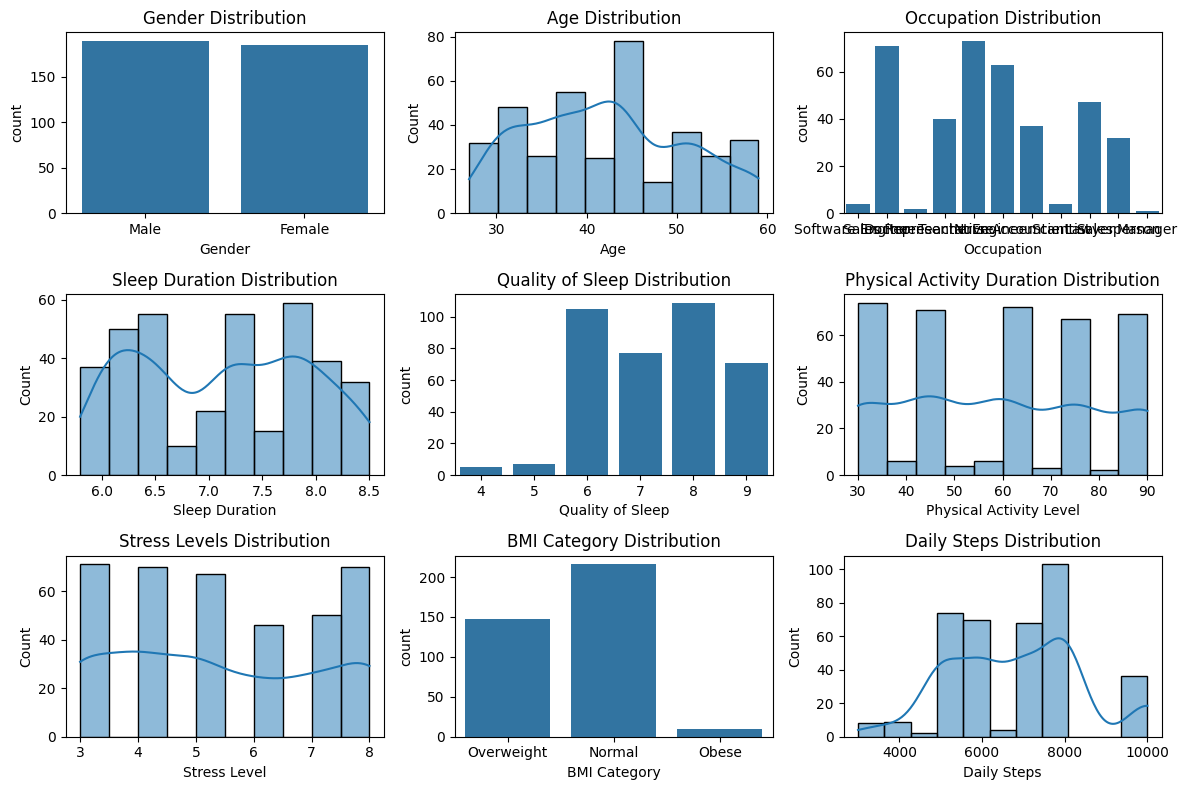

In [36]:
plt.figure(figsize=(12, 8))

# Gender
plt.subplot(3, 3, 1)
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')

# Age
plt.subplot(3, 3, 2)
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')

# Occupation
plt.subplot(3, 3, 3)
sns.countplot(x='Occupation', data=data)
plt.title('Occupation Distribution')

# Sleep Duration
plt.subplot(3, 3, 4)
sns.histplot(data['Sleep Duration'], kde=True)
plt.title('Sleep Duration Distribution')

# Quality of Sleep
plt.subplot(3, 3, 5)
sns.countplot(x='Quality of Sleep', data=data)
plt.title('Quality of Sleep Distribution')

# Physical Activity Duration
plt.subplot(3, 3, 6)
sns.histplot(data['Physical Activity Level'], kde=True)
plt.title('Physical Activity Duration Distribution')

# Stress Levels
plt.subplot(3, 3, 7)
sns.histplot(data['Stress Level'], kde=True)
plt.title('Stress Levels Distribution')

# BMI Category
plt.subplot(3, 3, 8)
sns.countplot(x='BMI Category', data=data)
plt.title('BMI Category Distribution')

# Daily Steps
plt.subplot(3, 3, 9)
sns.histplot(data['Daily Steps'], kde=True)
plt.title('Daily Steps Distribution')

plt.tight_layout()
plt.show()

In [37]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


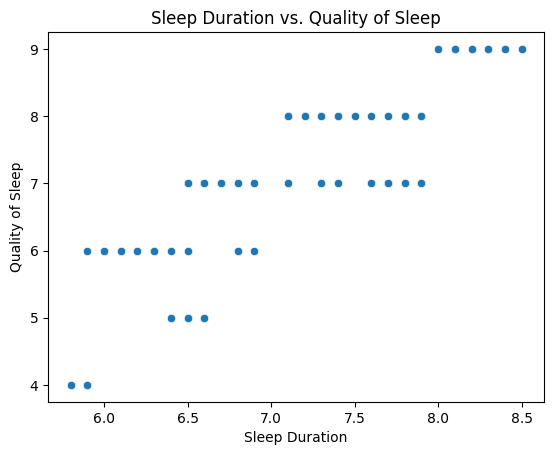

In [38]:
# Sleep Duration vs. Quality of Sleep:
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', data=data)
plt.title('Sleep Duration vs. Quality of Sleep')
plt.show()

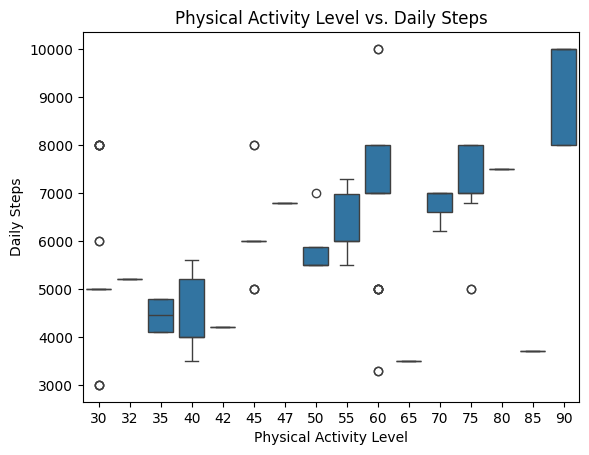

In [39]:
# Physical Activity Level vs. Daily Steps:
sns.boxplot(x='Physical Activity Level', y='Daily Steps', data=data)
plt.title('Physical Activity Level vs. Daily Steps')
plt.show()

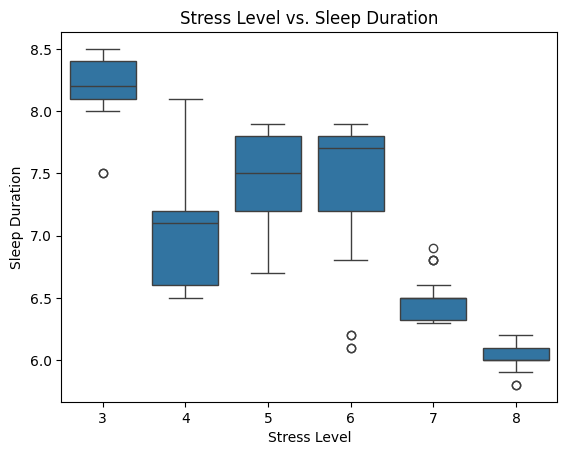

In [40]:
# Stress Level vs Sleep Duration
sns.boxplot(x='Stress Level', y='Sleep Duration', data=data)
plt.title('Stress Level vs. Sleep Duration')
plt.show()

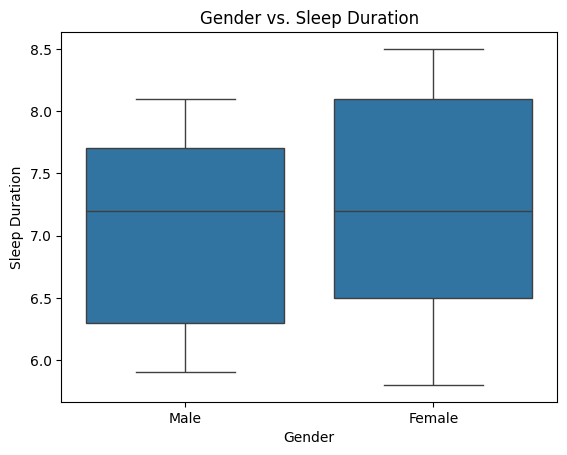

In [41]:
# Gender vs Sleep Duration
sns.boxplot(x='Gender', y='Sleep Duration', data=data)
plt.title('Gender vs. Sleep Duration')
plt.show()

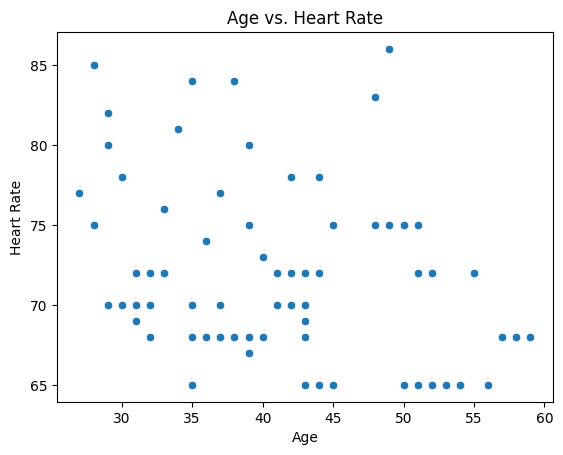

In [42]:
# Age vs Heart Rate:
sns.scatterplot(x='Age', y='Heart Rate', data=data)
plt.title('Age vs. Heart Rate')
plt.show()

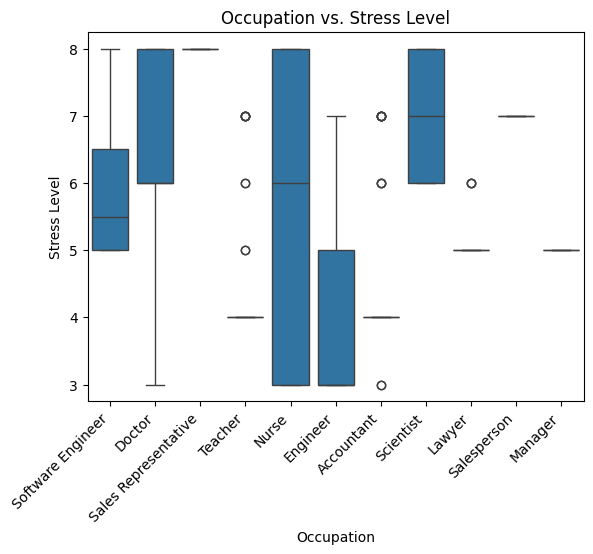

In [43]:
# Occupation vs Stress Level:
sns.boxplot(x='Occupation', y='Stress Level', data=data)
plt.title('Occupation vs. Stress Level')
plt.xticks(rotation=45, ha='right')
plt.show()

In [44]:
# Spliting 'Blood Pressure' into 'Systolic' and 'Diastolic'
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True).astype(int)

# Droping the original 'Blood Pressure' column
data = data.drop('Blood Pressure', axis=1)

data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


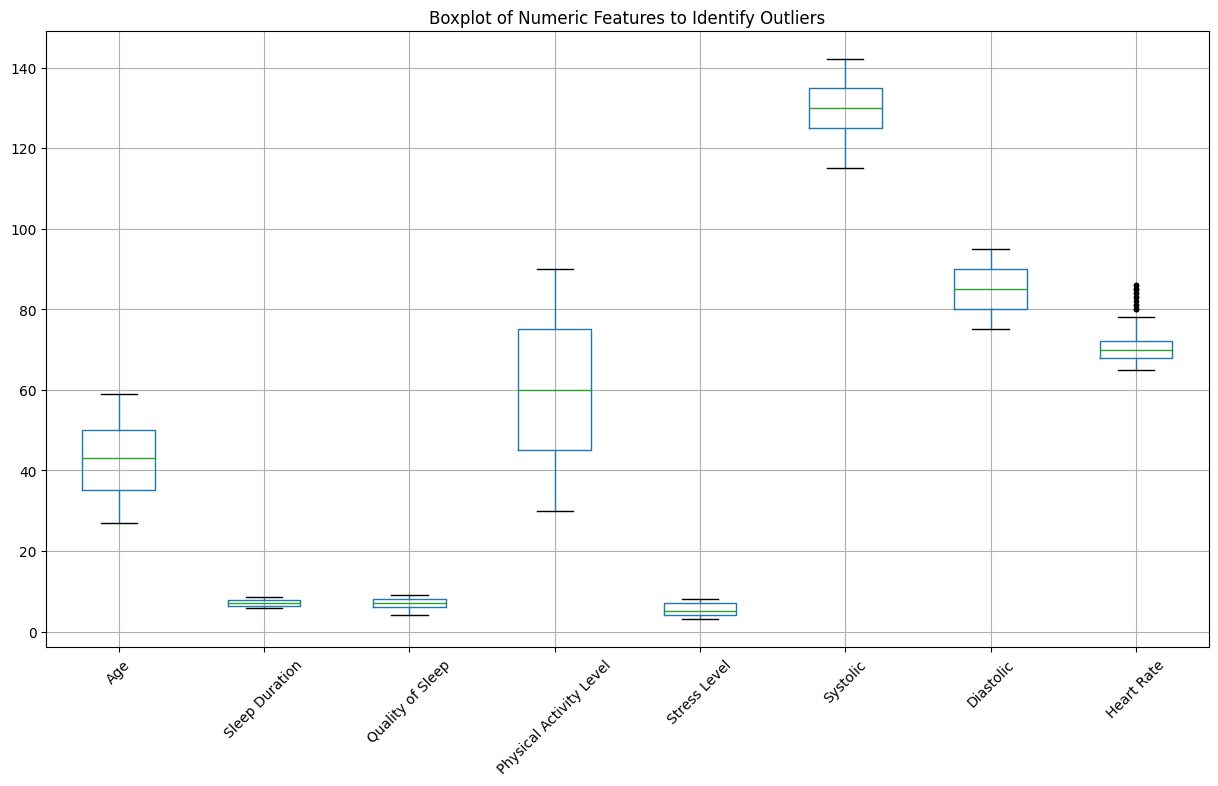

Rows containing outliers:
Empty DataFrame
Columns: [Person ID, Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Heart Rate, Daily Steps, Sleep Disorder, Systolic, Diastolic]
Index: []


In [45]:
numeric_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Systolic', 'Diastolic', 'Heart Rate']

# Box plots to visualize outliers
plt.figure(figsize=(15, 8))
data[numeric_features].boxplot(sym='k.', whis=1.5)
plt.title('Boxplot of Numeric Features to Identify Outliers')
plt.xticks(rotation=45)
plt.show()

# Z-score method for outlier detection
z_scores = zscore(data[numeric_features])
abs_z_scores = abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)

# Printing the rows containing outliers
print("Rows containing outliers:")
print(data[outliers])

In [46]:
le_Gender = preprocessing.LabelEncoder()
le_Gender.fit(['Female', 'Male'])
data['Gender'] = le_Gender.transform(data['Gender'])

In [47]:
le_BMI = preprocessing.LabelEncoder()
le_BMI.fit(['Normal', 'Overweight', 'Obese'])
data['BMI Category'] = le_BMI.transform(data['BMI Category'])

In [48]:
le_SD = preprocessing.LabelEncoder()
le_SD.fit(['None', 'Sleep Apnea', 'Insomnia'])
data['Sleep Disorder'] = le_SD.transform(data['Sleep Disorder'])

In [49]:
le_Occupation = preprocessing.LabelEncoder()
le_Occupation.fit(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher','Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer','Salesperson', 'Manager'])
data['Occupation'] = le_Occupation.transform(data['Occupation'])

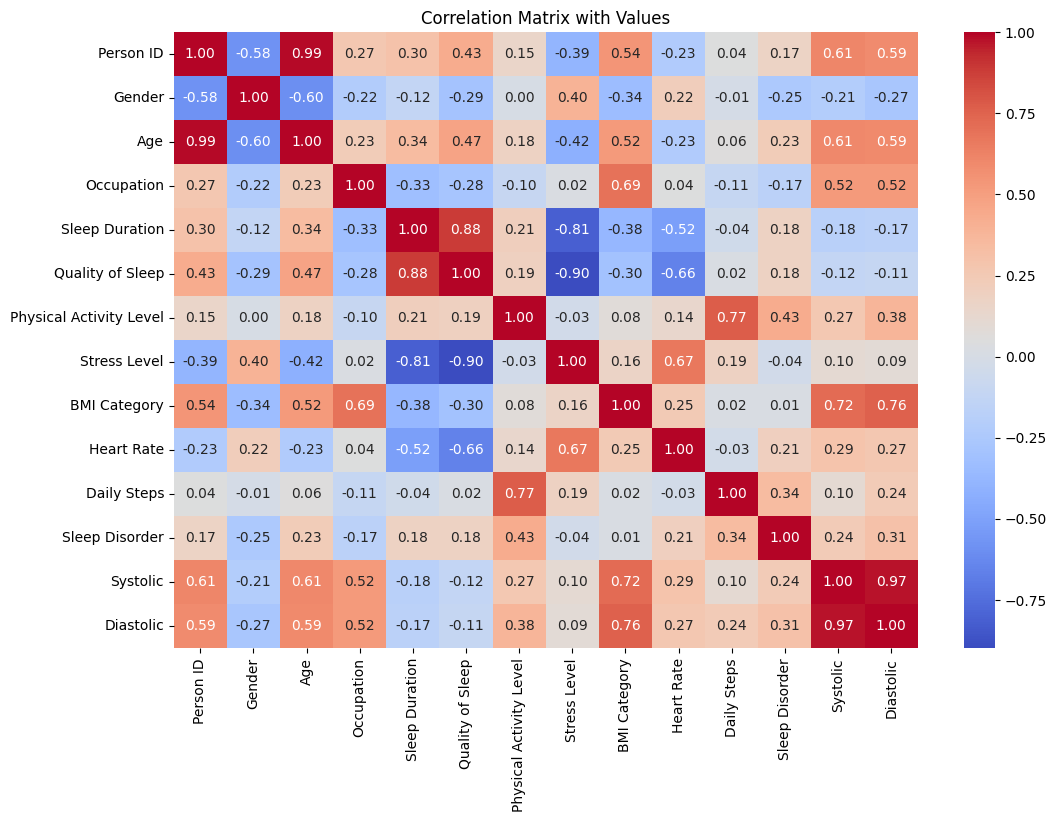

In [50]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with Values')
plt.show()

In [51]:
#Standardizing Values using StandardScaler()
numeric_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']

# Standardize the numeric features
scaler = preprocessing.StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [52]:
#Dependent Variables
X = np.asarray(data[['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']])
X[0:5]

array([[ 1.        , -1.75309569,  9.        , -1.29888693, -1.09828011,
        -0.82541823,  0.34702051,  2.        ,  1.6547187 , -1.61958404,
        -0.33000229, -0.26810236],
       [ 1.        , -1.63764266,  1.        , -1.17303623, -1.09828011,
         0.03984423,  1.47559156,  0.        ,  1.17047394,  1.97007745,
        -0.45923879, -0.7556402 ],
       [ 1.        , -1.63764266,  1.        , -1.17303623, -1.09828011,
         0.03984423,  1.47559156,  0.        ,  1.17047394,  1.97007745,
        -0.45923879, -0.7556402 ],
       [ 1.        , -1.63764266,  6.        , -1.55058833, -2.77142374,
        -1.40225988,  1.47559156,  1.        ,  3.5916977 , -2.36227262,
         1.47930869,  0.86948594],
       [ 1.        , -1.63764266,  6.        , -1.55058833, -2.77142374,
        -1.40225988,  1.47559156,  1.        ,  3.5916977 , -2.36227262,
         1.47930869,  0.86948594]])

In [53]:
#Independent Variables
y = np.asarray(data['Sleep Disorder'])
y[0:5]

array([1, 1, 1, 2, 2])

In [54]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42, stratify=y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (261, 12) (261,)
Test set: (113, 12) (113,)


In [55]:
logreg_model = LogisticRegression(max_iter=10000)

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # Change 'l1' to 'l2'
    'solver': ['lbfgs'],  # Keep only 'lbfgs' solver
}

# Create GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy on Test Set: {accuracy}')

Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy on Test Set: 0.9203539823008849


In [56]:
model1 = LogisticRegression(C = 100, penalty = 'l2', solver = 'lbfgs', max_iter = 10000)
model1

LogisticRegression(C=100, max_iter=10000)

In [57]:
#fitting the model

model1.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=10000)

In [58]:
#predicting for both train and test sets
model1pred_train = model1.predict(X_train)
model1pred_test = model1.predict(X_test)

In [66]:
%pip install scikit-learn-intelex
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier  # Add this import
from sklearn.metrics import accuracy_score
from sklearnex import patch_sklearn
patch_sklearn()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy on Test Set: 0.9380530973451328


In [68]:
# Model training
model2 = RandomForestClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split= 10, n_estimators = 200, random_state=42)
model2

RandomForestClassifier(min_samples_split=10, n_estimators=200, random_state=42)

In [69]:
#fitting the model

model2.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=200, random_state=42)

In [70]:
#predicting for both train and test sets
model2pred_train = model2.predict(X_train)
model2pred_test = model2.predict(X_test)

In [71]:
# Accuracy Score

print("LR Model's Accuracy: ", accuracy_score(y_test, model1pred_test))

LR Model's Accuracy:  0.9203539823008849


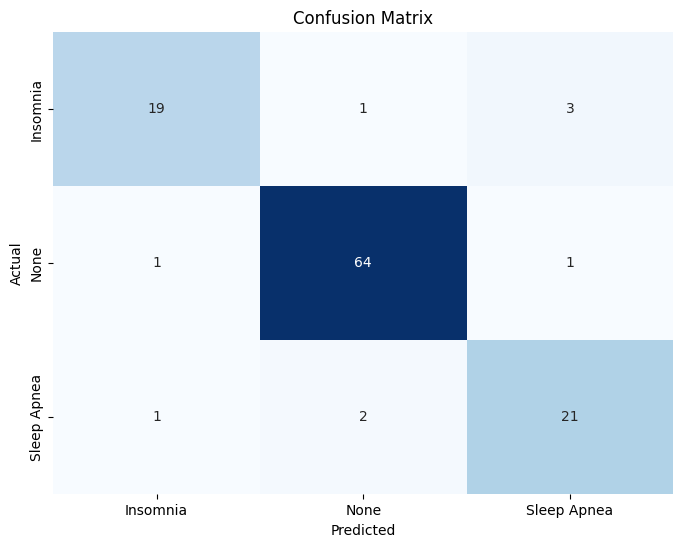

In [72]:
#Confusion Matrix
cm = confusion_matrix(y_test, model1pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Insomnia", "None", "Sleep Apnea"],
            yticklabels=["Insomnia", "None", "Sleep Apnea"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [73]:
#Classification Report

report1 = classification_report(y_train, model1pred_train)

print("Train Set Classification Report:")
print(report1)

report2 = classification_report(y_test, model1pred_test)

print("Test Set Classification Report:")
print(report2)

Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        54
           1       0.91      0.94      0.93       153
           2       0.90      0.87      0.89        54

    accuracy                           0.90       261
   macro avg       0.89      0.87      0.88       261
weighted avg       0.90      0.90      0.90       261

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        23
           1       0.96      0.97      0.96        66
           2       0.84      0.88      0.86        24

    accuracy                           0.92       113
   macro avg       0.90      0.89      0.89       113
weighted avg       0.92      0.92      0.92       113



In [74]:
# Accuracy Score

print("RFC Model's Accuracy: ", accuracy_score(y_test, model2pred_test))

RFC Model's Accuracy:  0.9380530973451328


In [75]:
#Classification Report

report1 = classification_report(y_train, model2pred_train)

print("Train Set Classification Report:")
print(report1)

report2 = classification_report(y_test, model2pred_test)

print("Test Set Classification Report:")
print(report2)

Train Set Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        54
           1       0.93      0.95      0.94       153
           2       0.91      0.91      0.91        54

    accuracy                           0.92       261
   macro avg       0.91      0.90      0.91       261
weighted avg       0.92      0.92      0.92       261

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        23
           1       0.98      0.98      0.98        66
           2       0.84      0.88      0.86        24

    accuracy                           0.94       113
   macro avg       0.91      0.91      0.91       113
weighted avg       0.94      0.94      0.94       113



In [4]:
pip install gradio

In [5]:
import gradio as gr

# Define the function to suggest health based on input parameters
def suggest_health(age, physical_activity_level, stress_level, gender, heart_rate, blood_pressure, sleep_disorder):
    suggestions = []

    # Health suggestions based on age and physical activity level
    if age <= 12 and physical_activity_level <= 2:
        suggestions.append("For children below 12 years with low physical activity level, it's important to encourage outdoor play and limit screen time.")

    # Health suggestions based on stress level
    if stress_level >= 7:
        suggestions.append("High stress level can negatively impact your health. Consider practicing relaxation techniques such as meditation or yoga.")

    # Health suggestions based on sleep disorder
    if sleep_disorder.lower() == "insomnia":
        suggestions.append("For managing insomnia, limit caffeine intake, include foods rich in tryptophan, and avoid heavy meals close to bedtime.")

    # Additional health suggestions based on other factors (heart rate, blood pressure, etc.)
    if float(heart_rate) > 100 or float(blood_pressure) > 120:
        suggestions.append("High heart rate or blood pressure may indicate cardiovascular health issues. Please consult a healthcare professional.")

    # Health suggestions when age, stress, and blood pressure are normal
    if age > 12 and stress_level < 7 and float(blood_pressure) <= 120:
        suggestions.append("Your age, stress level, and blood pressure are within normal ranges. Keep up the good work!")

    return "\n".join(suggestions)

# Create the Gradio interface
iface = gr.Interface(
    fn=suggest_health,
    inputs=[
        gr.Number(label="Age"),
        gr.Number(label="Physical Activity Level"),
        gr.Number(label="Stress Level"),
        gr.Radio(["Male", "Female"], label="Gender"),
        gr.Textbox(label="Heart Rate"),
        gr.Textbox(label="Blood Pressure"),
        gr.Textbox(label="Sleep Disorder")
    ],
    outputs=gr.Textbox(label="Health Suggestions"),  # Define the output type
    title="Life Style Health Suggestion"
)

# Launch the interface
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f696cfd7551b5619e5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
